# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


In [1]:
%matplotlib inline
import pandas as pd

In [2]:

import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")

In [3]:
names.sort()
import HaarFrontal as faceDetector
faceDetector.processDatabase(dataset, names)

# headPose dataset の検出処理後のデータ解析

In [4]:
import pandas as pd
import readheadPose
df = pd.read_csv("log_headPose_0.csv")

pitches = []
yaws = []
angles = []
for index, rows in df.iterrows():
#    print index, rows["name"]
    pitch, yaw = readheadPose.getAngles(rows["name"])
    pitches.append(float(pitch))    
    yaws.append(float(yaw))    
    angles.append("%s_%s" % (pitch, yaw))

df["angles"] = angles
df["pitch"] = pitches
df["yaws"] = yaws



print df.groupby("num").count()



     name  truePositives  falsePositives  angles  pitch  yaws
num                                                          
0    1902           1902            1902    1902   1902  1902
1     885            885             885     885    885   885
2       3              3               3       3      3     3


In [5]:
print "検出数の分布(比率)"
print df.groupby("num").count()/float(df.shape[0])

検出数の分布(比率)
         name  truePositives  falsePositives    angles     pitch      yaws
num                                                                       
0    0.681720       0.681720        0.681720  0.681720  0.681720  0.681720
1    0.317204       0.317204        0.317204  0.317204  0.317204  0.317204
2    0.001075       0.001075        0.001075  0.001075  0.001075  0.001075


検出数のヒストグラム


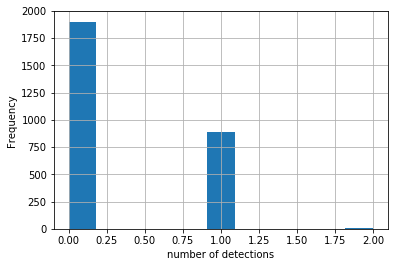

In [6]:
print "検出数のヒストグラム"
ax = df["num"].hist(bins=11)
ax.set_xlabel("number of detections")
ax.set_ylabel("Frequency")


## HaaR Cascade の検出器のついて
haarcascade_frontalface_default.xml
を用いているので、正面向き以外に対しては検出性能に限界がある。


## 検出数の分布を角度の組み合わせごとに集約する

In [7]:
dfSum = df.groupby("angles").sum();


In [8]:
dfSum = dfSum.drop("pitch", axis=1);
dfSum = dfSum.drop("yaws", axis=1);
dfSum

,num,truePositives,falsePositives
angles,,,
+0_+0,28,28,0
+0_+15,28,28,0
+0_+30,27,27,0
+0_+45,17,17,0
+0_+60,8,8,0
+0_+75,4,4,0
+0_+90,1,1,0
+0_-15,29,29,0
+0_-30,27,27,0


In [9]:
dfMean = df.groupby("angles").mean()
dfMean

,num,truePositives,falsePositives,pitch,yaws
angles,,,,,
+0_+0,0.933333,0.933333,0,0,0
+0_+15,0.933333,0.933333,0,0,15
+0_+30,0.900000,0.900000,0,0,30
+0_+45,0.566667,0.566667,0,0,45
+0_+60,0.266667,0.266667,0,0,60
+0_+75,0.133333,0.133333,0,0,75
+0_+90,0.033333,0.033333,0,0,90
+0_-15,0.966667,0.966667,0,0,-15
+0_-30,0.900000,0.900000,0,0,-30


In [10]:
dfMean = dfMean.drop("pitch", axis=1);
dfMean = dfMean.drop("yaws", axis=1);
dfMean

,num,truePositives,falsePositives
angles,,,
+0_+0,0.933333,0.933333,0
+0_+15,0.933333,0.933333,0
+0_+30,0.900000,0.900000,0
+0_+45,0.566667,0.566667,0
+0_+60,0.266667,0.266667,0
+0_+75,0.133333,0.133333,0
+0_+90,0.033333,0.033333,0
+0_-15,0.966667,0.966667,0
+0_-30,0.900000,0.900000,0


降べきの順に表示させる。
そうすると、どの角度範囲までが検出率が高いのかがわかる。

In [11]:
dfMean.sort_values("truePositives", ascending=False)

,num,truePositives,falsePositives
angles,,,
+15_+0,0.966667,0.966667,0.000000
+0_-15,0.966667,0.966667,0.000000
+15_-15,0.966667,0.966667,0.000000
+15_+15,0.966667,0.966667,0.000000
+0_+0,0.933333,0.933333,0.000000
+30_+0,0.933333,0.933333,0.000000
+0_+15,0.933333,0.933333,0.000000
-15_+0,0.933333,0.933333,0.000000
-15_+15,0.933333,0.933333,0.000000


In [12]:
df["num"].mean()


0.3193548387096774

In [13]:
print df[df["num"]==0]


                                         name  num  truePositives  \
0      headPose/Person01/person01100-90+0.jpg    0              0   
1     headPose/Person01/person01101-60-90.jpg    0              0   
2     headPose/Person01/person01102-60-75.jpg    0              0   
3     headPose/Person01/person01103-60-60.jpg    0              0   
4     headPose/Person01/person01104-60-45.jpg    0              0   
5     headPose/Person01/person01105-60-30.jpg    0              0   
6     headPose/Person01/person01106-60-15.jpg    0              0   
7      headPose/Person01/person01107-60+0.jpg    0              0   
8     headPose/Person01/person01108-60+15.jpg    0              0   
9     headPose/Person01/person01109-60+30.jpg    0              0   
10    headPose/Person01/person01110-60+45.jpg    0              0   
11    headPose/Person01/person01111-60+60.jpg    0              0   
12    headPose/Person01/person01112-60+75.jpg    0              0   
13    headPose/Person01/person0111

pitch　が 90 のデータは検出されていないものが多いことがわかる。

In [14]:
print df[df["pitch"]==90]

                                        name  num  truePositives  \
92    headPose/Person01/person01192+90+0.jpg    0              0   
185   headPose/Person01/person01292+90+0.jpg    0              0   
278   headPose/Person02/person02192+90+0.jpg    0              0   
371   headPose/Person02/person02292+90+0.jpg    0              0   
464   headPose/Person03/person03192+90+0.jpg    0              0   
557   headPose/Person03/person03292+90+0.jpg    0              0   
650   headPose/Person04/person04192+90+0.jpg    0              0   
743   headPose/Person04/person04292+90+0.jpg    0              0   
836   headPose/Person05/person05192+90+0.jpg    0              0   
929   headPose/Person05/person05292+90+0.jpg    0              0   
1022  headPose/Person06/person06192+90+0.jpg    0              0   
1115  headPose/Person06/person06292+90+0.jpg    0              0   
1208  headPose/Person07/person07192+90+0.jpg    0              0   
1301  headPose/Person07/person07292+90+0.jpg    

In [15]:
print df[df["pitch"]==90].groupby("num").count()
print "num 0で表示されたcount だけ未検出だったことがわかる"

     name  truePositives  falsePositives  angles  pitch  yaws
num                                                          
0      29             29              29      29     29    29
1       1              1               1       1      1     1
num 0で表示されたcount だけ未検出だったことがわかる


In [16]:
print df[df["num"]==2]
print "検出数が２つ以上あるものは、誤検出を含んでいることがわかる"

                                        name  num  truePositives  \
271   headPose/Person02/person02185+60+0.jpg    2              1   
428  headPose/Person03/person03156+15-45.jpg    2              2   
874  headPose/Person05/person05237-15+60.jpg    2              2   

     falsePositives   angles  pitch  yaws  
271               1   +60_+0     60     0  
428               0  +15_-45     15   -45  
874               0  -15_+60    -15    60  
検出数が２つ以上あるものは、誤検出を含んでいることがわかる


顔がひとつしかない画像を入力にしているので、検出された時は１、未検出の時は０になる


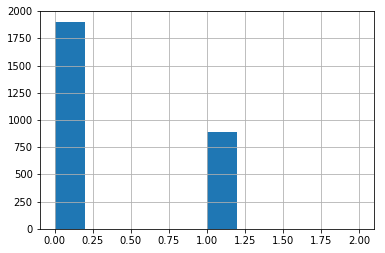

In [17]:
df["truePositives"].hist()
print "顔がひとつしかない画像を入力にしているので、検出された時は１、未検出の時は０になる"

In [19]:
df.shape


(2790, 7)

In [20]:
print df.groupby("truePositives").count()

               name   num  falsePositives  angles  pitch  yaws
truePositives                                                 
0              1903  1903            1903    1903   1903  1903
1               885   885             885     885    885   885
2                 2     2               2       2      2     2


In [24]:
df[df["truePositives"]==0]


,name,num,truePositives,falsePositives,angles,pitch,yaws
0,headPose/Person01/person01100-90+0.jpg,0,0,0,-90_+0,-90,0
1,headPose/Person01/person01101-60-90.jpg,0,0,0,-60_-90,-60,-90
2,headPose/Person01/person01102-60-75.jpg,0,0,0,-60_-75,-60,-75
3,headPose/Person01/person01103-60-60.jpg,0,0,0,-60_-60,-60,-60
4,headPose/Person01/person01104-60-45.jpg,0,0,0,-60_-45,-60,-45
5,headPose/Person01/person01105-60-30.jpg,0,0,0,-60_-30,-60,-30
6,headPose/Person01/person01106-60-15.jpg,0,0,0,-60_-15,-60,-15
7,headPose/Person01/person01107-60+0.jpg,0,0,0,-60_+0,-60,0
8,headPose/Person01/person01108-60+15.jpg,0,0,0,-60_+15,-60,15
9,headPose/Person01/person01109-60+30.jpg,0,0,0,-60_+30,-60,30
